In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Simple Linear Regression

In [2]:
# Step1 : Import Required libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [6]:
# Step 2: Read the dataset
url='https://raw.githubusercontent.com/goradbj/MachineLearning/main/Regression/Road-Accidents-2018-Annexure-1.csv'
df=pd.read_csv(url)
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.0,14500.0,70100.0,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.0,24000.0,109100.0,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.0,54100.0,244100.0,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.0,64463.0,311500.0,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.0,70781.0,323200.0,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


In [7]:
# Step 3: Exploratory Data Analysis and Data Preprocessing
df.shape

(29, 16)

In [8]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents Per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [14]:
# Select only relevant columns for building model
df=df[['Years','Total Number of Persons Killed (in numbers)']]
df.head()

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.0
1,1980,24000.0
2,1990,54100.0
3,1994,64463.0
4,1995,70781.0


In [15]:
df.tail()

,Years,Total Number of Persons Killed (in numbers)
24,2015,146133.00
25,2016,150785.00
26,2017,147913.00
27,2018,151417.00
28,CAGR 2008/2018,2.36


In [16]:
# Drop lat record(28) as it is not in proper format
mdf=df.drop(df.index[28])

In [17]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


In [18]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Years                                        28 non-null     object 
 1   Total Number of Persons Killed (in numbers)  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [19]:
# Check for missing value
mdf.isnull().sum()

Years                                          0
Total Number of Persons Killed (in numbers)    0
dtype: int64

In [20]:
# Data is already in numerical so no need of encoding

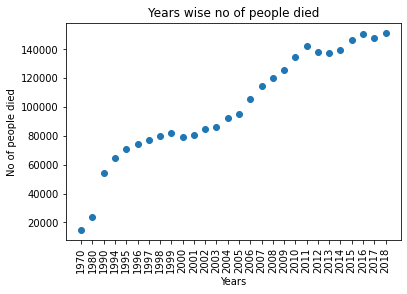

In [22]:
### Data Visulazation
plt.scatter(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'])
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("No of people died")
plt.title("Years wise no of people died")
plt.show()

By observing this graph we can say that,year and no of people died is having linear relationship

In [23]:
X=mdf[['Years']]

In [24]:
y=mdf[['Total Number of Persons Killed (in numbers)']]

In [25]:
print(mdf.shape)

(28, 2)


In [26]:
X.shape

(28, 1)

In [27]:
y.shape

(28, 1)

In [28]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [29]:
print(mdf.shape)
print(X.shape)
print(y.shape)
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(28, 2)
(28, 1)
(28, 1)
(22, 1)
(6, 1)
(22, 1)
(6, 1)


In [32]:
# Step No. 04 - Build Model
rapmodel=linear_model.LinearRegression()
rapmodel.fit(X_tr,y_tr)

LinearRegression()

In [34]:
# value of m
rapmodel.coef_

array([[3304.27733333]])

In [35]:
# value of c
rapmodel.intercept_

array([-6516943.68048485])

In [37]:
# step 4 - do the prediction
rapmodel.predict([[2050]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[256824.85284849]])

In [38]:
256824/365

703.6273972602739

In [41]:
rapmodel.predict([[2018]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[151087.97818182]])

In [42]:
y_pred=rapmodel.predict(X_te)
y_pred

array([[104828.09551515],
       [ 91610.98618182],
       [111436.65018182],
       [151087.97818182],
       [ 94915.26351515],
       [ 75089.59951515]])

In [44]:
## step 6: Evqaluate the model
mae=mean_absolute_error(y_pred,y_te)
mse=mean_squared_error(y_pred,y_te)
rmse=np.sqrt(mse)
r2=r2_score(y_pred,y_te)

In [45]:
print(mae)
print(mse)
print(rmse)
print(r2)

8210.43612121263
93026975.49343391
9645.049273769104
0.8329348969906796


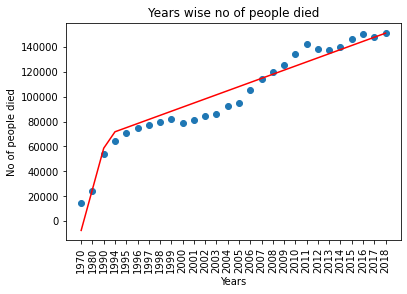

In [50]:
# step no 7 - plot prediction line
plt.scatter(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'])
plt.plot(mdf['Years'],rapmodel.predict(mdf[['Years']]),color='red')
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("No of people died")
plt.title("Years wise no of people died")
plt.show()

## Multilinear Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/goradbj/datascience/master/carprices_tr_tst_ex1.csv")

In [5]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [6]:
df.isna().sum()

Mileage          0
Age(yrs)         0
Sell Price($)    0
dtype: int64

In [7]:
df.columns

Index(['Mileage', 'Age(yrs)', 'Sell Price($)'], dtype='object')

In [8]:
### Divide data into input and output
X=df[['Mileage',"Age(yrs)"]]

In [9]:
y=df['Sell Price($)']

In [11]:
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [12]:
X.head()

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [26]:
### Divide data into training and testing part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 3)
(14, 2)
(6, 2)
(14,)
(6,)


In [15]:
## build model now

In [16]:
cppmodel = linear_model.LinearRegression()

In [17]:
cppmodel.fit(X_train,y_train)

LinearRegression()

In [18]:
# m1 and m2 is
cppmodel.coef_

array([-5.05035336e-01,  1.56827193e+03])

In [19]:
# c is 
cppmodel.intercept_

47834.90766025816

In [21]:
## do the prediction now
cppmodel.predict([[69000,6]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22397.10101931])

In [22]:
## do the prediction now
cppmodel.predict([[500,1]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49150.66191961])

In [23]:
-5.05035336e-01*500 + 1.56827193e+03*1+47834.90766025816

49150.661922258165

In [28]:
### Lets evaluate the model
y_test

6     32000
19    28200
18    12800
9     22000
8     12000
5     26750
Name: Sell Price($), dtype: int64

In [30]:
y_pred=cppmodel.predict(X_test)

In [31]:
y_pred

array([29414.42980922, 29414.42980922, 16139.9876188 , 23407.17169195,
       14422.86747531, 25879.18245499])

In [32]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1973.474055178148
4654045.406156497
2157.3236674538425
0.9190910559017218


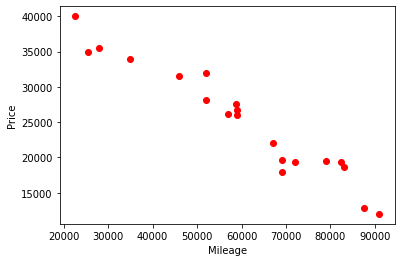

In [34]:
plt.scatter(df["Mileage"],df["Sell Price($)"],  color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


In [35]:
df.columns

Index(['Mileage', 'Age(yrs)', 'Sell Price($)'], dtype='object')

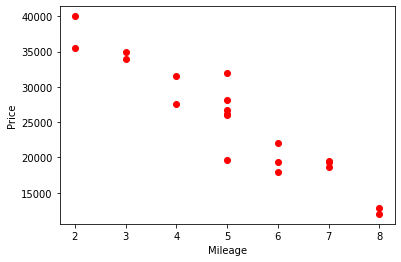

In [36]:
plt.scatter(df["Age(yrs)"],df["Sell Price($)"],  color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()
